In [3]:
%cd /content/drive/MyDrive/Research/Bank_Loan Prediction

/content/drive/MyDrive/Research/Bank_Loan Prediction


In [4]:
%ls

bank_loan.csv  Bank_Loan.ipynb  mydecisiontree.png


In [5]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from google.colab import files 
# uploaded = files.upload()

In [6]:
df = pd.read_csv("bank_loan.csv")
print(df)

       age          job  marital  education  ... previous  poutcome deposit loan
0       59       admin.  married  secondary  ...        0   unknown     yes   no
1       56       admin.  married  secondary  ...        0   unknown     yes   no
2       41   technician  married  secondary  ...        0   unknown     yes   no
3       55     services  married  secondary  ...        0   unknown     yes   no
4       54       admin.  married   tertiary  ...        0   unknown     yes   no
...    ...          ...      ...        ...  ...      ...       ...     ...  ...
11157   33  blue-collar   single    primary  ...        0   unknown      no   no
11158   39     services  married  secondary  ...        0   unknown      no   no
11159   32   technician   single  secondary  ...        0   unknown      no   no
11160   43   technician  married  secondary  ...        5   failure      no  yes
11161   34   technician  married  secondary  ...        0   unknown      no   no

[11162 rows x 17 columns]


In [7]:
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


X = df[features]
y = df['loan']

print(X)
print(y)

       age          job  marital  education  ... pdays  previous poutcome deposit
0       59       admin.  married  secondary  ...    -1         0  unknown     yes
1       56       admin.  married  secondary  ...    -1         0  unknown     yes
2       41   technician  married  secondary  ...    -1         0  unknown     yes
3       55     services  married  secondary  ...    -1         0  unknown     yes
4       54       admin.  married   tertiary  ...    -1         0  unknown     yes
...    ...          ...      ...        ...  ...   ...       ...      ...     ...
11157   33  blue-collar   single    primary  ...    -1         0  unknown      no
11158   39     services  married  secondary  ...    -1         0  unknown      no
11159   32   technician   single  secondary  ...    -1         0  unknown      no
11160   43   technician  married  secondary  ...   172         5  failure      no
11161   34   technician  married  secondary  ...    -1         0  unknown      no

[11162 rows x 1

In [8]:
x = df[features]

le_x= LabelEncoder()

x=x.apply(LabelEncoder().fit_transform)

x

,age,job,marital,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,2,4,8,671,1,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,15,1,2,0,0,425,1,0,19,0,255,0,0,0,3,0
11158,21,7,1,1,0,1149,0,2,15,6,81,3,0,0,3,0
11159,14,9,2,1,0,453,0,0,18,1,154,1,0,0,3,0
11160,25,9,1,1,0,424,0,0,7,8,7,1,155,5,0,0


In [9]:
y = df['loan']

le_y= LabelEncoder()

y=le_y.fit_transform(y)

y


array([0, 0, 0, ..., 0, 1, 0])

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.460211 to fit



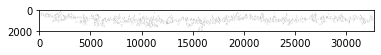

In [10]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [11]:
print(dtree.predict([[12, 8, 1, 2, 0, 7, 1, 2, 3, 5, 13, 3, 0, 2, 1, 0]]))
print ("'0' means he will get no loan")
print ("'1' means he will get loan")

[1]
'0' means he will get no loan
'1' means he will get loan
